<style>
@media print
{
h2 {page-break-before:always}
}
</style>

# Homework 06

### Brown University  
### DATA 1010  
### Fall 2019

## Problem 1

Generate a random $n \times d$ feature matrix `X`, and then change its last column so as to induce an approximate (but not exact) linear dependence relationship involving all of the last three columns. Then define the response vector `y` to be an approximate linear combination of the first two columns. 

Let $d = 10$, and explore the behavior of the coefficient vector `X \ y` for various values of $n$ (including ones less than $d$, equal to $d$ and greater than $d$). Show how lasso and ridge regression mitigate the problems you observe.

Hint: make bar plots of the coefficients you obtain, following the example in [Data Gymnasia](https://mathigon.org/course/machine-learning/a-regression-example-linear-models). 

## Problem 2

Suppose that for each $i = 1,2,\ldots, n$, the random vector $\mathbf{X}_i$ is chosen from a distribution on $\mathbb{R}^p$ and then $Y_i$ is chosen from the Bernoulli distribution with probability $r(\mathbf{X}_i)$, where $r: \mathbb{R}^p \to [0,1]$ is some function.

(a) Given $\mathbf{y} \in \{0,1\}^n$, find $\mathbb{P}( (Y_1, \ldots, Y_n) =
    \mathbf{y} | \mathbf{X}_1, \mathbf{X}_2, \ldots, \mathbf{X}_n)$.

(b) Suppose that multiple candidate $r$'s are proposed. Show that
    finding the one which maximizes your answer to (a) is the same as
    finding the one that minimizes
    $$\sum_{i=1}^{n} \left[y_i \log \frac{1}{r(X_i)} +(1-y_i)\log\frac{1}{1-r(X_i)}\right]$$

## Problem 3

Train a QDA classifier for identifying a car as American or Japanese based on its weight and MPG rating. Use the `cars` dataset from the `VegaDatasets` package. Show the classification regions in different colors.   

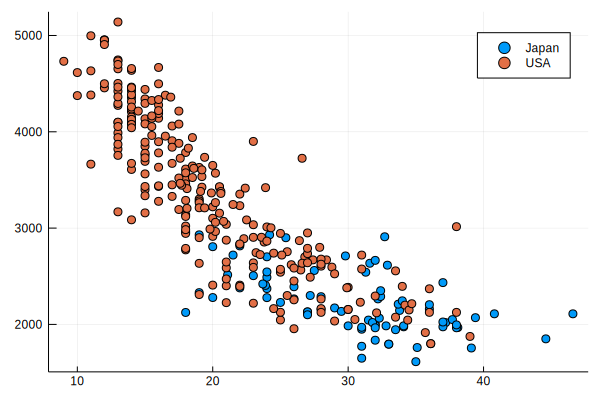

In [1]:
using VegaDatasets, Plots, DataFrames
D = DataFrame(dataset("cars"))
cars = [((x,y),c) for (x,y,c) in zip(D[:,:Miles_per_Gallon],
                                     D[:,:Weight_in_lbs],
                                     D[:,:Origin]) 
           if !any(ismissing.([x,y,c])) && c ≠ "Europe"]
x₁s = [x₁ for ((x₁,x₂),y) in cars]
x₂s = [x₂ for ((x₁,x₂),y) in cars]
ys = [y for ((x₁,x₂),y) in cars]
scatter(x₁s,x₂s,group=ys)

## Problem 4

Train a classifier based on kernel density estimation for identifying a car as American or Japanese based on its weight and MPG rating. Use the `cars` dataset from the `VegaDatasets` package. Show the classification regions in different colors.   

Next we discard missing data and subset on the `:Origin` column. 

Now we use the `KernelDensity` package to fit kernel density estimators.

We can also visualize the classification function: 

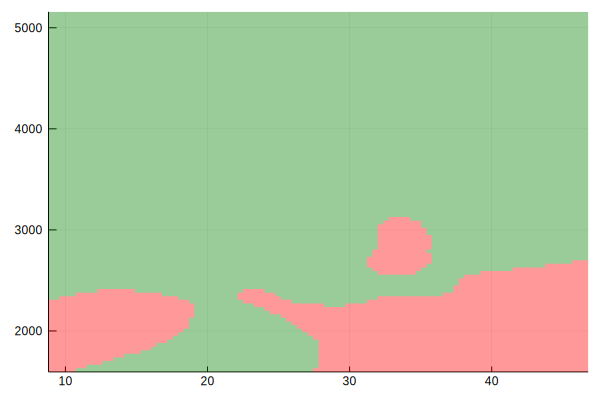

In [2]:
heatmap(LinRange(a, b, 100), LinRange(c, d, 100), 
        (x,y) -> size(japan, 1)*pdf(japan_estimator, x, y) > size(usa, 1) * pdf(us_estimator, x, y),
        fillcolor = cgrad([:green, :red]), fillopacity = 0.4, colorbar = false)

## Problem 5

(a) Serialize each of the first 1000 images in the MNIST data set and compute the pairwise Euclidean distances between the resulting vectors. Make a histogram of the resulting list of a million numbers. 

(b) Repeat the exercise from (a) with 1000 white-noise images (`rand(28,28)`). 

In [3]:
using JLD
images = load("mnist.jld")["images"]

28×28×1000 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.0       0.0        0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.215686  0.533333   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.67451   0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.886275  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.992157   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.831373   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.992157  0.529412   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0        …  0.992157  0.517647   0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0           0.956863  0.0627451  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0117647     0.521569  0.0      